<i><b>Public-AI</b></i>
### ✎&nbsp;&nbsp;week 4. DNN Basis

# Section 1. 텐서플로우로 선형회귀 구현하기

앞서 살펴본 것처럼 선형회귀모델과 같은 머신러닝 모델이나 딥러닝 모델을 직접 넘파이로 구현할 수도 있지만, 딥러닝 프레임워크를 활용하면 복잡한 딥러닝 모델을 쉽고 빠르게 연산할 수 있습니다. 딥러능 프레임워크에는 다양한 형태의 프레임워크가 있지만 이번시간에 다루는 프레임워크는 바로 텐서플로우입니다. 좀 더 구체적으로는 (1) 딥러닝 프레임워크에는 어떤 것들이 있는지 알아보고, (2) 대표적인 딥러닝 프레임워크인 텐서플로우의 케라스를 이용해 선형회귀를 구현해 보도록 하겠습니다.

### _Objective_
1. **딥러닝 프레임워크란** : 딥러닝 프레임워크의 필요성과 종류에 대해 알아봅니다. 
2. **텐서플로우 활용해보기**: 딥러닝 프로그래밍에 활용되는 대표적인 프레임워크 텐서플로우(Tensorflow)를 이용해 선형회귀 알고리즘을 구현하는 방법을 간략하게 알아봅니다.


In [1]:
%matplotlib inline
import numpy as np

import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt

# \[ 1. 딥러닝 프레임워크란 \]
---

머신러닝 모델을 구현하여 프로덕트를 개발하려면 무엇을 알아야 할까요? 딥러닝 프레임워크를 적절하게 활용할 수 있어야 합니다. 파이썬과 넘파이로도 딥러닝 모델을 구성하고 학습시킬 수 있지만, 이러한 딥러닝 프레임워크를 이용하면 훨씬 더 간결하게 문제를 해결할 수 있습니다. (1) 딥러닝 프레임워크가 왜 필요한지 알아보고, (2) 다양한 딥러닝 프레임워크의 종류와 장단점을 알아봅시다.

## (1) 딥러닝 프레임워크의 필요성

딥러닝 모델을 만들기 위해서는 복잡한 수식을 코드로 구현해야 합니다. 수식을 직접 구현하지 않고, 이미 잘 구현된 코드들을 이용해 딥러닝 모델을 만든다면 한결 간편할 것입니다. 이러한 딥러닝 모델을 개발하기 위한 도구들의 집합을 **딥러닝 프레임워크**라 합니다.

## (2) 다양한 딥러닝 프레임워크

딥러닝 프레임워크에는 다양한 것들이 존재합니다. 2018년 기준 가장 인기 있는 딥러닝 프레임워크로는 Tensorflow, Keras, Pytorch가 있습니다. 

<img src="https://imgur.com/0tX4EXs.png" width="600"/>

상위 세 개의 프레임워크 모두 널리 이용되고 있는 프레임워크입니다. 각 프레임워크 별 핵심 특징은 아래와 같습니다.

* Tensorflow(텐서플로우) :
    1. 가장 많은 유저 수
    2. 다양한 환경(IoT, Web Server, Mobile)등에 유연하게 딥러닝 모델을 이식할 수 있음
    3. 초기에 배우기가 어려움
* Keras(케라스) : 
    1. 다른 프레임워크(Tensorflow, Theano, CNTK)을 기반으로 그 위에서 딥러닝 모델을 구현
    2. 쉽고 빠르게 딥러닝 모델을 구현할 수 있음
* Pytorch(파이토치) : 
    1. "Define-by-Run" 스타일로 구현된 딥러닝 프레임워크
    2. 디버깅이 용이
    <br>

자신의 목적에 맞게 프레임워크를 선택하여 사용합니다. 이번 수업 시간에서는 Tensorflow 와 Keras를 이용하여 딥러닝 모델을 구현해보겠습니다.

## (3) Numpy, Tensorflow, Keras의 관계

<img src="https://imgur.com/bB7YzFA.png" width="400">

Python, Numpy, Tensorflow, Keras는 위 그림과 같은 관계를 가지고 있습니다. Numpy는 Python에서 수치 연산을 보다 편리하게 만들어주기 위해 만들어진 라이브러리입니다. Tensorflow는 여러 수치 연산 중 머신러닝에 특화된 수치 연산을 보다 최적화하여 구현된 프레임워크입니다. 그리고 텐서플로우에서의 딥러닝 모델 개발을 좀 더 쉽게 만들어준 API가 바로 Keras입니다.

# \[ 2. 텐서플로우 활용해보기 \]#
---
텐서플로우의 케라스는 딥러능 프레임워크이지만, 선형회귀모델 역시 모델링할 수 있습니다. 딥러닝 모델의 이론을 배우기에 앞서 (1) 선형회귀 모델과 딥러닝 모델을 케라스로 구성하는 방법을 살펴보며 텐서플로우와 케라스 사용 방법을 익히고,(2) 앞서 사용한 왓챠 보고싶어요 수로 관객수 예측하기 데이터를 이용해 케라스로 선형회귀 모델을 만들어 학습시켜보겠습니다. 

## 1. 케라스로 선형회귀 모델 구성하기

딥러닝 프레임워크 중 하나인 케라스에는 딥러닝, 머신러닝 문제를 풀기 위한 많은 요소들이 잘 구현되어 있습니다. 이들의 조합으로도 우리가 원하는 형태의 머신러닝과 딥러닝 모형을 쉽게 구축할 수 있습니다. 이번에는 케라스로 어떻게 선형 회귀 모델을 구현하는지 알아본 봅시다. 

### (1) 선형회귀 모델 구성하기

선형회귀식은 간단히 표현하면 아래와 같습니다. 

$$
\hat y(x) = w_1 x + w_0
$$

위의 수식을 케라스로 구현해야 합니다. 케라스는 머신러닝 모델을 **층의 연결**로 표현합니다. 선형 회귀분석 모델을 케라스로 구현하려면 입력값을 받는 **Input** 층과, 선형 변환을 수행하는 **Dense** 층을 만들어야 합니다.

In [2]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [3]:
# (1) 입력값의 형태 결정하기

# (2) 출력값의 형태 결정하기 

# (3) 레이어를 연결하기

# (4) 모델 구성하기
linear_model = ""

위의 작업은 실제로 아래와 같은 순서로 동작한다고 생각하면 됩니다.

<img src = 'https://i.imgur.com/1gvtTYp.png' width = 800>

### (2) 구성한 모델 살펴보기

이렇게 Input 층과 Dense 층이 연결되면 모델에서 학습해야 하는 가중치들이 결정됩니다.<br>

#### `summary` : 모델의 요약정보 보기

#### `get_weights` : 가중치 가져오기

[array([[-1.1600207]], dtype=float32), array([0.], dtype=float32)]

### (3) 모델에 데이터 입력하여 예측값 구하기 

위 가중치 값은 아직 모델을 학습하여 최적의 가중치를 찾기 전, 임의로 지정한 값입니다. 위의 모델에 입력값을 넣어 출력값을 계산해보도록 하겠습니다.

#### x =1일 때의 예측값

#### x=2일 때의 예측값

#### x=1, x=2,x=3일 때의 예측값 동시에 구하기

## 2. 케라스로 모델 학습시키기

이제 케라스로 선형회귀 모델을 구성하는 방법을 배웠으니, 예제 데이터를 넣어 모델을 학습시켜봅시다. 

### 예제 데이터 ) 빅데이터로 예측한 '옥자' 관객 수

* 이전까지 개봉했던 영화의 보고싶어요 수와 관객 수를 바탕으로, 옥자의 예상 관객 수 예측하기

아래의 데이터는 영화 추천 프로그램 `왓챠`의 '보고싶어요'수와 실제 관객수를 바탕으로 2017년 개봉한 영화 "옥자"의 '보고싶어요'수를 기준으로 "옥자"의 총 관객 수를 예측해보기 위한 데이터입니다.

참고 : [빅데이터로 예측한 옥자 관객 수 727만 명](http://platum.kr/wp-content/uploads/2017/06/unnamed-12.png)
<img src="http://platum.kr/wp-content/uploads/2017/06/unnamed-12.png" width="500" height="500"/><br>

| 영화 제목 | 왓챠'보고싶어요' 수 | 총 관객 수(만명) | 
| ------  | -------        | -----    |
| 마션     | 8759           | 487      |
| 킹스맨   | 10132           | 612     |
| 캡틴아메리카 | 12078         | 866     |
| 인터스텔라 | 16430          | 1030    |
| 옥자     | 12008          | ?       |

In [10]:
movie_df = pd.DataFrame([
    [8759, 487],
    [10132,612],
    [12078,866],
    [16430,1030]],
    columns=["nums_want_to_see","nums_audience"])
movie_df.index = ["마션","킹스맨","캡틴아메리카","인터스텔라"]
movie_df

,nums_want_to_see,nums_audience
마션,8759,487
킹스맨,10132,612
캡틴아메리카,12078,866
인터스텔라,16430,1030


### (1) 모델의 손실함수 및 경사하강법 지정하기

케라스로 만든 선형회귀 모델을 최종 컴파일하기 전에, '손실함수'와 '옵티마이저'를 지정해야 합니다. 손실함수는 손실을 계산하는 함수로, 손실(losses)은 모델을 훈련하는 동안 최소화되어야 하는 값을 뜻합니다. 모델의 목적에 맞게 손실 함수를 구성해야 합니다. 이전 시간에 배웠던 평균제곱오차(Mean-Squared-Error)는 대표적인 손실함수 중 하나입니다. 이번에도 이 손실함수를 이용하겠습니다. 

<img src = 'https://i.imgur.com/BwyRYZE.png' width = "600">

한편, 옵티마이저는 손실함수를 기반으로 네트워크 내 가중치들이 어떻게 변화될지를 결정하는 방법을 뜻합니다. 지난 시간에 선형 회귀 모델을 학습시켰던 경사하강법(Gradient Descent)도 옵티마이저의 하나입니다. 이번에도 이를 옵티마이저로 사용하겠습니다. 평균제곱오차를 손실함수로 지정하려면, `tensorflow.keras.losses` 에서 `MeanSquaredError`를 가져와 모델을 컴파일 할 때 `MeanSquaredError()`를 `loss`로 지정해주면 됩니다. 경사하강법, 그 중에서도 확률적 경사하강법을 옵티마이저로 지정하려면 `tensorflow.keras.optimizers` 에서 `SGD`를 가져와 모델을 컴파일할 때 `optimizer`로 지정해주면 됩니다. 

In [11]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import SGD

#### 모델에 손실함수 와 옵티마이저 지정하기

In [12]:
loss = MeanSquaredError()
optimizer=SGD(2e-10)

# TODO

### (2) 선형회귀 모형 학습시키기

입력 데이터(x)와 그에 상응하는 타깃 데이터(y)의 쌍을 통해, 모형 내 가중치들이 학습됩니다. <br>

In [13]:
# 학습이 전혀 되지 않았을 때의 예측 값
y_pred = linear_model.predict(movie_df['nums_want_to_see'])
movie_df['prediction'] = y_pred
movie_df

,nums_want_to_see,nums_audience,prediction
마션,8759,487,-10160.621094
킹스맨,10132,612,-11753.330078
캡틴아메리카,12078,866,-14010.730469
인터스텔라,16430,1030,-19059.140625


In [14]:
# 학습이 전혀 되지 않았을 때의 Weight
linear_model.get_weights()

[array([[-1.1600207]], dtype=float32), array([0.], dtype=float32)]

케라스에서는 입력 데이터와 타깃 데이터에 맞춰 가중치들을 갱신해주는 함수가 `model.fit()`으로 구현되어 있습니다.<br>
학습을 100번만 해보도록 하겠습니다.

In [15]:
history = linear_model.fit(x=movie_df['nums_want_to_see'], 
                           y=movie_df['nums_audience'], 
                           epochs=100, verbose=0)

W0203 13:25:35.390592 4579415488 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.series.Series'>, <class 'NoneType'>


In [16]:
# 학습이 전혀 되지 않았을 때의 예측 값
y_pred = linear_model.predict(movie_df['nums_want_to_see'].values)

movie_df['prediction'] = y_pred
movie_df

,nums_want_to_see,nums_audience,prediction
마션,8759,487,533.809143
킹스맨,10132,612,617.485291
캡틴아메리카,12078,866,736.082458
인터스텔라,16430,1030,1001.310974


`history.history`에는 훈련을 반복할 때마다 모델의 손실을 기록하였습니다. 이를 시각화해보면, 모델의 손실이 얼만큼씩 줄어들면서 가중치가 갱신되었는지 알 수 있습니다. 40회차 정도 학습이 진행되었을 때, 손실이 줄어드는 정도가 급격히 줄어든 것을 알 수 있습니다. 100번까지 학습시켰으니, 더 이상 손실을 줄일 수 없는 정도에서 최종 가중치가 결정되었습니다. 

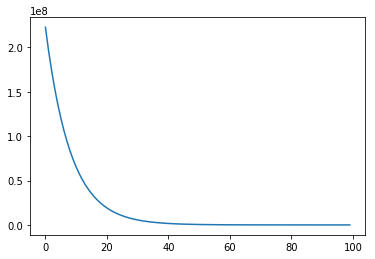

In [17]:
plt.plot(history.history['loss'])
plt.show()

### (3) 결과 시각화하기
이제 이렇게 학습된 모델의 최종 추세선을 그려봅시다. 

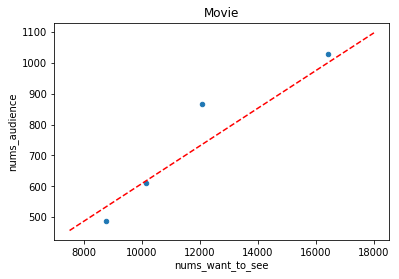

In [18]:
pred_inputs = np.arange(7500, 18000)
pred_outputs = linear_model.predict(pred_inputs[:,None])

movie_df.plot(x='nums_want_to_see',y='nums_audience',
              kind='scatter', title="Movie")
plt.plot(pred_inputs, pred_outputs, 'r--')
plt.show()

### (4) 케라스 vs Numpy 비교하기

<img src = "https://i.imgur.com/YcRJkQ5.png" width = "1000">

## 3. 케라스로 다양한 모델 구성하기 : 다변수 선형회귀 모델부터 딥러닝 모델까지
입력 변수와 출력 변수가 하나인 가장 기본적인 선형회귀 모델을 케라스로 구성하여 학습시킨 후, 결과를 확인해보았습니다. 이처럼 데이터를 통해 모델을 학습시킨다는 것은 원하는 출력값이 나오도록 가중치(Weight)와 편향(Bias)를 갱신해나가는 과정을 의미합니다. 이는 머신러닝 모델과 딥러닝 모델에서 공통적으로 이루어지는 부분입니다. 케라스에서 선형회귀 이외의 다양한 모델을 구성하는 방법 역시 앞서 해본 단변수 선형회귀 모델을 구성하는 방법과 크게 다르지 않습니다. 이번에는 아래 세 가지 모델을 알아보고, 이를 케라스로 구성하는 방법을 살펴봅시다. 

1. 단변수 선형회귀보다 입력 값이 늘어난다면? -> 다변수 선형 회귀
2. 출력의 형태가 확률이라면? -> 로지스틱 회귀 
3. 층을 좀 더 쌓는다면? -> 딥러닝

<img src = 'https://i.imgur.com/yoB1CHf.png' width = "600">

### (1) 다변수 선형회귀 모델 구성하기
먼저, 단변수 선형회귀 모델보다 입력 데이터($X$)의 변수가 늘어난 경우 만들 수 있는 다변수 선형회귀 모델을 살펴봅시다. 
다변수 선형회귀 모델을 수식으로 표현하면 아래와 같습니다. 

$$
\hat y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3
$$

위의 수식을 딥러닝 모델로 그리면 아래와 같습니다.<br>

<img src="https://i.imgur.com/ERPmb49.png" width="200">

In [19]:
# (1) 입력층의 형태 결정하기


# (2) 출력층의 형태 결정하기 


# (3) 레이어를 연결하기


# (4) 모델 구성하기


# (2) 다변수 다출력 선형회귀 모델 구성하기
여기서 출력 값이 하나가 아닌 2개라면 어떻게 될까요? 다변수 다출력 선형회귀모형을 수식으로 나타내면 아래와 같습니다. 

$$
\hat y_1 = w_{1,0} + w_{1,1} x_1 + w_{1,2} x_2 + w_{1,3} x_3 \\
\hat y_2 = w_{2,0} + w_{2,1} x_1 + w_{2,2} x_2 + w_{2,3} x_3
$$

위의 수식을 딥러닝 모델로 그리면 아래와 같습니다.<br>

<img src="https://i.imgur.com/x42Y2S4.png" width="200">

In [21]:
# (1) 입력층의 형태 결정하기


# (2) 출력층의 형태 결정하기 


# (3) 레이어를 연결하기


# (4) 모델 구성하기


In [ ]:
model.summary()

### (3) 다변수 로지스틱 회귀 모델 구성하기

이번에는 출력값의 형태가 실수가 아닌 확률값이라고 해봅시다. 출력값의 형태가 확률인 모델을 우리는 "로지스틱 회귀"라고 부릅니다. <br>
다변수 로지스틱 회귀 모델을 수식으로 표현하면 아래와 같습니다. 

$$
{\hat y = \sigma(w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3)} \\
$$

아까와 다르게, $\sigma$라는 연산이 하나 붙었습니다. 이를 로지스틱 함수라고 부릅니다.<br>
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

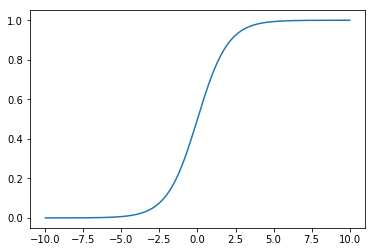

In [23]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-10.,10.,10000)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

로지스틱 함수($\sigma(x)$)는 실수의 범위($-\infty  \mbox{~} \infty$)을 확률의 범위($0 \mbox{~} 1$)로 바꾸어주는 함수입니다.<br>
확률로 결과값을 나타내는 이런 함수는 분류 문제에서 널리 쓰입니다. 이에 대해서는 다음 시간에 좀 더 자세히 배우도록 하겠습니다.

위 수식을 딥러닝 모델로 그리면 아래와 같습니다. 

<img src="https://i.imgur.com/M9THoCU.png" width="200">


In [24]:
# (1) 입력층의 형태 결정하기

# (2) 출력층의 형태 결정하기 

# (3) 레이어를 연결하기

# (4) 모델 구성하기

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               [(None, 3)]               0         
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### (4) 딥러닝 모델(2층 신경망) 모델 구성하기
앞으로 배우게 될 딥러닝 역시 `Input`층과 `Dense`층이 있고 이를 연결하여 구성된다는 점에서 앞서 배운 모델과 유사합니다. <br>
다른 점은, 딥러닝에는 바로  **은닉층**이라 불리는 연산층이 있다는 점입니다.<br>
은닉층이 추가된 2층 신경망 형태의 딥러닝 모델을 수식으로 표현하면 아래와 같습니다. 
$$
{a^{[1]}_1 = \sigma(w^{[1]}_0 + w^{[1]}_{1,1} x_1 + w^{[1]}_{1,2} x_2)} \\
{a^{[1]}_2 = \sigma(w^{[1]}_0 + w^{[1]}_{2,1} x_1 + w^{[1]}_{2,2} x_2)} \\
{\hat y = \sigma(w^{[2]}_0 + w^{[2]}_1 a^{[2]}_1  + w^{[2]}_2 a^{[2]}_2 )}
$$

입력층 - 은닉층 - 출력층으로 구성되어있는 위 2층 신경망 모델을 그림으로 표현하면 아래와 같습니다. 

<img src="https://i.imgur.com/rO3PmKo.png" width="300">

In [26]:
# (1) 입력층의 형태 결정하기

# (2) 은닉층의 형태 구성하기

# (3) 출력층의 형태 구성하기

# (4) 레이어를 연결하기

# (5) 모델 구성하기

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2020/01/13


---